#### Video url = "https://youtu.be/0B5eIE_1vpU?t=190"

In [39]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X , y = load_boston(return_X_y = 1)

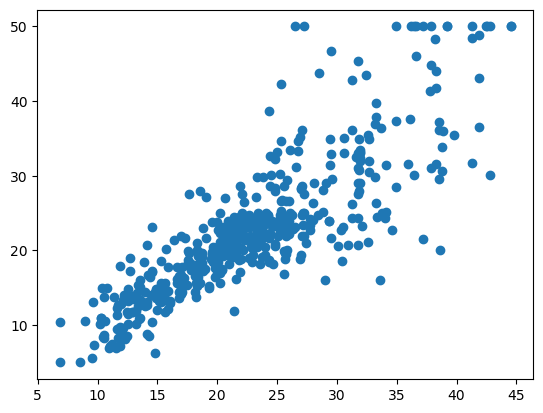

In [42]:
from sklearn.neighbors import KNeighborsRegressor

mod = KNeighborsRegressor()
mod.fit(X,y)
prvals = mod.predict(X)

plt.scatter(prvals , y)

In [43]:
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

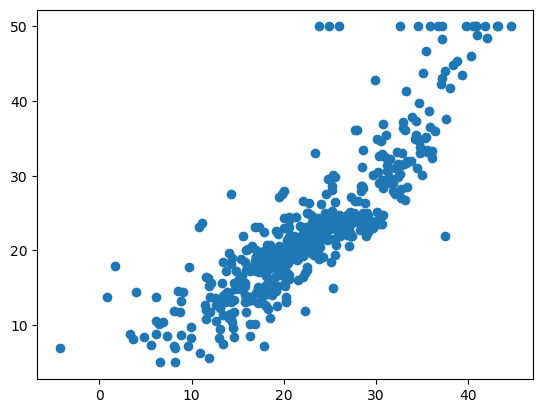

In [47]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X,y)
prvals = mod.predict(X)

plt.scatter(prvals,y)

In [45]:
mod.predict(X)[:3]

array([30.00384338, 25.02556238, 30.56759672])

[23.72 22.84 31.54]


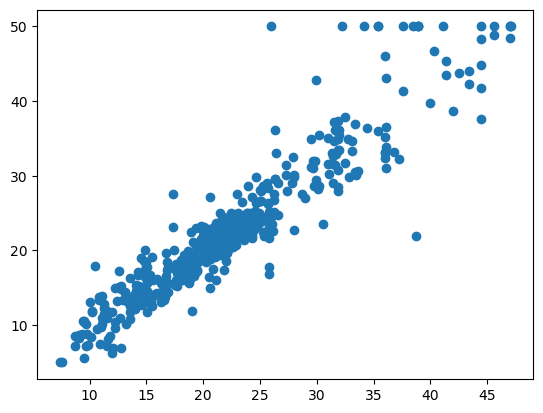

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('model',KNeighborsRegressor())
])
pipe.fit(X,y)
prvals = pipe.predict(X)
print(prvals[:3])
plt.scatter(prvals,y)

[24.  21.6 34.7]


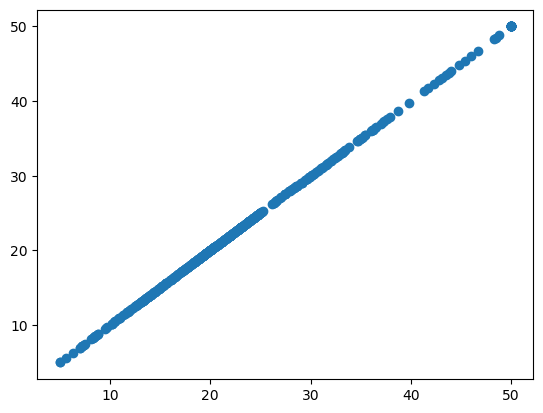

In [57]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('model',KNeighborsRegressor(n_neighbors = 1))
])
pipe.fit(X,y)
prvals = pipe.predict(X)
print(prvals[:3])
plt.scatter(prvals,y)

In [59]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [63]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(
    estimator = pipe,
    param_grid = { 'model__n_neighbors' : [1,2,3,4,5,6,7,8,9,10] },
    cv = 3  #No. of splits
)
mod.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [64]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003333,4.715390e-04,0.005667,1.247171e-03,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002667,4.713704e-04,0.004667,1.247023e-03,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.003333,4.714266e-04,0.004333,4.714827e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.003667,9.427969e-04,0.004333,9.427969e-04,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.003333,4.714266e-04,0.005000,8.165348e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.003000,8.164374e-04,0.004000,1.123916e-07,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.003000,1.123916e-07,0.004000,8.164374e-04,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.002667,4.713704e-04,0.003667,4.714828e-04,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002000,1.946680e-07,0.004333,4.713704e-04,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002333,4.713142e-04,0.004333,4.713704e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
